In [1]:
!pip install xlrd

In [2]:
!pip install autoviz

^C


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import missingno as no
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

%matplotlib inline

In [16]:
df = pd.read_csv("../input/breast-cancer-coimbra-data-set/dataR2.csv")

In [5]:
#checkrows and columns in the data set
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [6]:
df.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [7]:
df.shape

(116, 10)

In [8]:
print(df.dtypes)

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object


 Ckech the miss data: 0      0
1      0
2      0
3      0
4      0
      ..
111    0
112    0
113    0
114    0
115    0
Length: 116, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


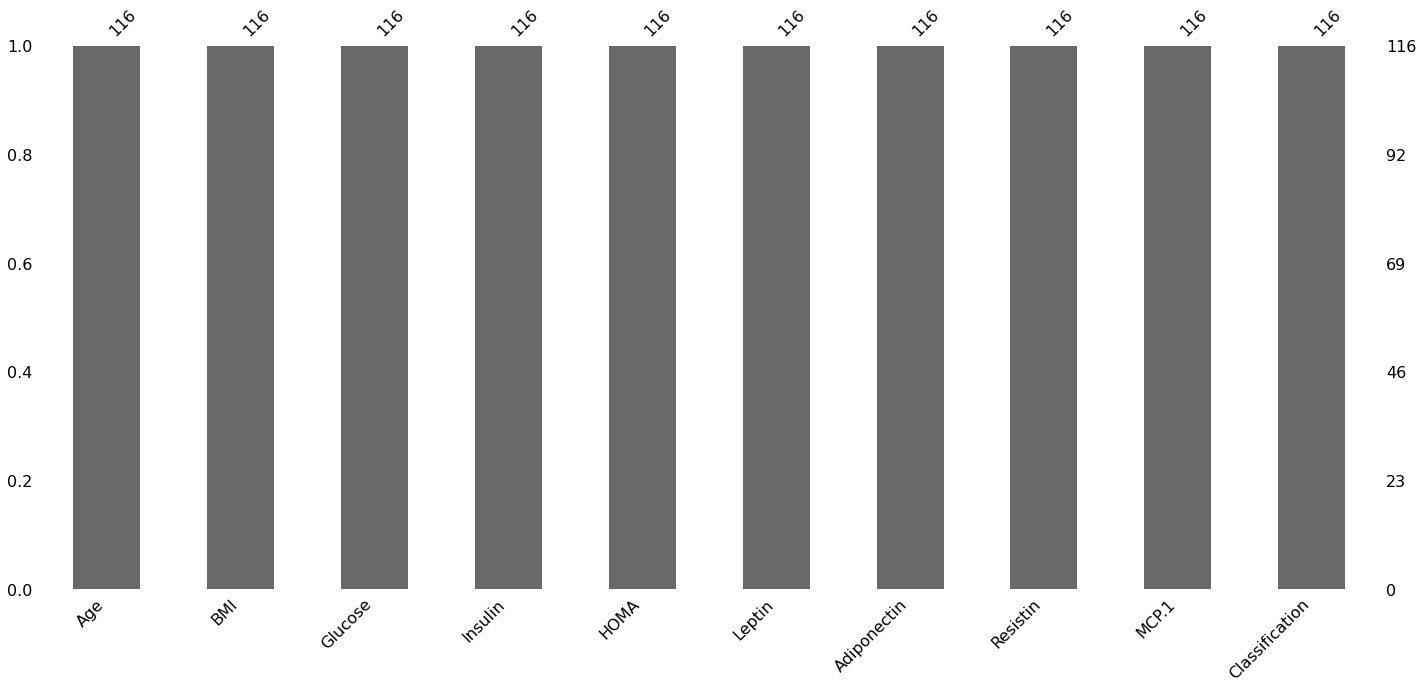

In [9]:
#Check the miss data
print(f' Ckech the miss data:',df.isna().sum(axis=1))
print(no.bar(df))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [11]:
df.quantile()

Age                56.000000
BMI                27.662416
Glucose            92.000000
Insulin             5.924500
HOMA                1.380939
Leptin             20.271000
Adiponectin         8.352692
Resistin           10.827740
MCP.1             471.322500
Classification      2.000000
Name: 0.5, dtype: float64

In [12]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [ ]:
import pandas_profiling as pp
profile = pp.ProfileReport(df, title="Breast Cancer Coimbra Disease")
profile

In [ ]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
g = sns.pairplot(df, diag_kind="Classification")
g.map_lower(sns.kdeplot, levels=4, color=".3")

In [ ]:
sns.pairplot(df,vars=['Age'],hue='Classification',height=5.5)
sns.pairplot(df,vars=['BMI'],hue='Classification',height=5.5)
sns.pairplot(df,vars=['Insulin'],hue='Classification',height=5.5)
sns.pairplot(df,vars=['HOMA'],hue='Classification',height=5.5)
sns.pairplot(df,vars=['Leptin'],hue='Classification',height=5.5)
sns.pairplot(df,vars=['Adiponectin'],hue='Classification',height=5.5)
sns.pairplot(df,vars=['Resistin'],hue='Classification',height=5.5)
sns.pairplot(df,vars=['MCP.1'],hue='Classification',height=5.5)

In [ ]:
#Get the correlation of the columns
df.corr()

In [ ]:
df.columns

In [ ]:
# Correlation ecah one feature
df[['Classification','Age']].corr()

In [ ]:
df[['Classification','BMI']].corr()

In [ ]:
df[['Classification','Glucose']].corr()

In [ ]:
df[['Classification','Insulin']].corr()

In [ ]:
df[['Classification','HOMA']].corr()

In [ ]:
df[['Classification','Leptin']].corr()

In [ ]:
df[['Classification','Adiponectin']].corr()

In [ ]:
df[['Classification','Resistin']].corr()

In [ ]:
df[['Classification','MCP.1']].corr()

In [ ]:
df['Classification'].value_counts()

df['Classification'].value_counts() * 100 / len(df)


sns.countplot(x='Classification', data=df, palette='viridis')

In [ ]:
df.columns

In [ ]:
#Select the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 0:9].values 
Y = df.iloc[:,9].values
#OR 
#X=df.drop("Classification", axis=1)
#Y=df["Classification"]
 

In [ ]:
## If anyone to see the data with features (X)
all_columns=['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin','Resistin', 'MCP.1']

X = pd.DataFrame(X,columns=all_columns[0:9])
all_columns[0:9]
X.head()

In [ ]:
Y[:]

In [ ]:
#Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:5]

In [ ]:
#All the models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state =0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree =DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)
  forest.fit(X_train, Y_train)
  



 #Using xgboostr method of ensemble class to use xgboostClassification algorithm
  import xgboost as xgb
  x_gb= xgb.XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=42, eval_metric=["auc", "error", "error@0.6"])
  x_gb.fit(X_train, Y_train)


  
    
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  print('[7]xgboost Classifier Training Accuracy:', x_gb.score(X_train, Y_train))
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest ,x_gb

model = models(X_train,Y_train)

In [ ]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
import numpy as np
for i in range(len(model)):
  print('Model ',i)
  #Check Accuracy precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print(F'Accuracy:',accuracy_score(Y_test, model[i].predict(X_test)))
  print(F'Precision:', precision_score(Y_test, model[i].predict(X_test)))
  print(F'Recall:', recall_score(Y_test, model[i].predict(X_test)))
  print(F'F1 Score:', f1_score(Y_test, model[i].predict(X_test)))

  #Check Roc Auc Score
  print( F'Roc Auc Score:',roc_auc_score(Y_test, model[i].predict(X_test)) )
  print( F'Balanced Accuracy Score:',balanced_accuracy_score(Y_test, model[i].predict(X_test)) ) 
  print( F'Confusion Matrix:',confusion_matrix(Y_test, model[i].predict(X_test)) )
  print()#Print a new line

In [ ]:
for i in range(len(model)):
  print('Model ',i)
# ROC CURVE
  plot_roc_curve(model[i], X_test, Y_test)
  plt.title('ROC Curve')
  plt.plot([0, 1], [0, 1], 'r--')
  plt.show()

In [ ]:
#Print Prediction of Random Forest Classifier model
pred = model[1].predict(X_test)
print(pred)
#Print a space
print()
#Print the actual values
print(Y_test)

In [ ]:
#Accuracy Score
acc_1 = 0.62 
acc_2 = 0.79
acc_3 = 0.54
acc_4 = 0.70
acc_5 = 0.54
acc_6 = 0.67
acc_7 = 0.67
acc_8 = 0.75


results = pd.DataFrame([["Logistic Regression",acc_1],["K-Nearest Neighbor",acc_2],[" SVM(Linear)",acc_3],
                       ["SVM(RBF)",acc_4],["Gaussian Naive Bayes",acc_5],
                       ["Decision Tree",acc_6],["Random Forest",acc_7],["Xgboost",acc_8]],
                        columns = ["Models","Accuracy Score"]).sort_values(by='Accuracy Score',ascending=False)


results.style.background_gradient(cmap='Blues')

In [ ]:
# Precision Score
Pre_1 = 0.62 
Pre_2 = 0.80
Pre_3 = 0.57
Pre_4 = 0.68
Pre_5 = 0.60
Pre_6 = 0.69
Pre_7 = 0.72
Pre_8 = 0.76


results = pd.DataFrame([["Logistic Regression",Pre_1],["K-Nearest Neighbor",Pre_2],[" SVM(Linear)",Pre_3],
                       ["SVM(RBF)",Pre_4],["Gaussian Naive Bayes",Pre_5],
                       ["Decision Tree",Pre_6],["Random Forest",Pre_7],["Xgboost",Pre_8]],
                        columns = ["Models","Precision Score"]).sort_values(by='Precision Score',ascending=False)


results.style.background_gradient(cmap='Blues')

In [14]:
# Recall Score
Rec_1 = 0.45 
Rec_2 = 0.76
Rec_3 = 0.61
Rec_4 = 0.71
Rec_5 = 0.46
Rec_6 = 0.69
Rec_7 = 0.61 
Rec_8 = 0.72

results = pd.DataFrame([["Logistic Regression",Rec_1],["K-Nearest Neighbor",Rec_2],[" SVM(Linear)",Rec_3],
                       ["SVM(RBF)",Rec_4],["Gaussian Naive Bayes",Rec_5],
                       ["Decision Tree",Rec_6],["Random Forest",Rec_7],["Xgboost",Rec_8]],
                        columns = ["Models","Recall Score"]).sort_values(by='Recall Score',ascending=False)


results.style.background_gradient(cmap='Blues')

,Models,Recall Score
1,K-Nearest Neighbor,0.760000
7,Xgboost,0.720000
3,SVM(RBF),0.710000
5,Decision Tree,0.690000
2,SVM(Linear),0.610000
6,Random Forest,0.610000
4,Gaussian Naive Bayes,0.460000
0,Logistic Regression,0.450000


In [22]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
